# Combining both AA and SS Data Sets
___
Both data sets will be concatenate to be used later for the Natural Learning Processing step.  
___

## Import Libraries
___

In [236]:
#import libraries
import pandas as pd
import nltk 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

pd.set_option('display.max_colwidth', 100)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

%matplotlib inline

## Load Data from Alcoholics Anonymous and Stop Smoking
___

In [237]:
#load the csv files
Alco_Anon_df = pd.read_csv("../data/Clean_Data_AA_Filtered_Messages_DF.csv")
Stop_Smok_df = pd.read_csv("../data/Clean_Data_SS_Filtered_Messages_DF.csv")

In [238]:
#constrained the maximum number of rows to run the study on.
#to reduce processing time and provide initial reading on how well can it process through train/testing

#create new dataframe instance for alcoholics anonymous
Alco_Anon_df = Alco_Anon_df[0:1000]

#create new dataframe instance for stop smoking 
Stop_Smok_df = Stop_Smok_df[0:1000]

In [239]:
#output sample size of the alcoholics anonymous dataframe
Alco_Anon_df.head()

,selftext,subreddit
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous
1,I’ve cut down on drinking and doubled my dose of Wellbutrin (maintaining the same amount of Lamictal) and tonight I’m feeling overheated and inexplicably terrified. My heart is pounding. I’m a bit twitchy. I am so afraid of the prospect of a seizure. Please grant me reassurance,alcoholicsanonymous
2,"In the meeting tonight this was the topic. It struck me because we fight so hard to hold on to the habits and lifestyles that completely demoralize are true authentic self . I was thinking back and wondering why so long did I hold on to the pain, was it pride or ego maybe it was the fact that I didn’t believe that life could get better. I had to do something and frankly even the bottle was getting old or should I say the same embarrassing messes I kept re-enacting hoping that one day my life would change. I person I once partied with was sober and suggested a meeting so I went. I walked into that room of 80+ alcoholics and was uncomfortable and not really taking it serious. I learned that day that I might have a slim chance of getting 1 month sober , it’s funny 1 month was my goal that was back in June 1 2018 3 + years later I was my home group and this was the topic . I did not know back then but I surrendered my old life for a brand new one and I don’t regret which team I have chosen. \n\nBest decision ever",alcoholicsanonymous
3,[removed],alcoholicsanonymous
4,https://m.youtube.com/watch?v=p4cJv6s_Yjw,alcoholicsanonymous


In [240]:
#output sample size of the stop smoking dataframe
Stop_Smok_df.head()

,selftext,subreddit
0,"I'm now at 100 days. I can't believe it honestly. It was super difficult but I'm glad I did it. Honestly at this point the cravings aren't troublesome, however still existent. I think I won't be returning to this habit. \n\nAt one point due to my addiction, consuming nicotine became my personality. I was constantly inhaling this garbage. Literally every couple of minutes I needed to take a hit. My health started to deteriorate, blood levels weren't normal and doctors started to get concerned. I still didn't give a fuck. I was very stubborn. One day however, breathing just became impossible. I'm now on two inhalers as a result. It scares me straight. \n\nTrust me when I say this, it's possible to quit. It's not impossible. Don't be like me and have to deal with a health consequence (hopefully temporary) to motivate you to quit. Let my health problems motivate you to do better.\n\nIf you're considering quitting, I believe in you! If I can do it, so can you.",stopsmoking
1,None,stopsmoking
2,"I've been a heavy smoker for a quite sometime smoking around 2 packs a day I quit few times the longest being around 2.5 months, around a month and half ago I decided I want to take better care of myself and my health and work on my running (my biggest dream is to become an elite runner and that doesn't really go well with smoking.)\n\nI've been doing great, Ive felt like I've been happy for the first time in so long and I was feeling like I can breath on my runs for the first time ever, but this weekend I went on a vacation with some co-workers and I got so drunk and smoked so much.\n\nI told myself that I'm in control and I won't let this be my relapse, I made it for a couple of days but today I smoked two cigarettes.\n\nI feel crushed and I'm losing meaning of life, I don't want to go back to the smoking life and I also don't want to live my life moping for a cigarette, I really don't know what to do I feel like I hate myself and my life. I'm stuck in a loop that I don't know how to get out.\n\nMaybe it's worth mentioning that I live with two roommates that both smokes and the smell is so triggering I can't begin to describe it. \n\nHow did you break the loop? does it ever get better?\n\nI feel like I'm a hopeless case and I don't want to live like this anymore, I really need some advice on how to not relapse again.",stopsmoking
3,I posted about my first attempt to quit here and that lasted 5 days. I got some lovely advice and encouragement from this wonderful community and I decided to have another go.\n\nIm 12 days nicotine free today!! Im so happy and proud of myself. It can be a bit difficult handling the withdrawals and I find myself very irritable sometimes. But im taking it one day at a time!! \n\nCheers to nicotine free lungs for good! ❤️ \nWishing you all luck in your journeys and im here to say it’s okay if you slip. Just get back on the wagon and make sure it doesn’t happen again. I believe in all of you.,stopsmoking
4,"As the title says, I decided enough is enough. My girlfriend quit 3 weeks ago, but I was stubborn, for some weird reason I just kept smoking. I got to the point where I smoke a pack a day, sometimes more. \n\nI want to be healthy, to cope with stress some other way, and be there for my girlfriend (future wife) and, God willing, my kids.\n\nSo I guess I'll be hanging around here, if you have any advice or just a comment of support, feel free to write!",stopsmoking


# Create csv for analysis of comment selftext text only
___
To get the best result for the study, we have decided to filter down the previous cleaned dataframes to just 'selftext' and 'subreddit' columns.  This is because the 'selftext' column contains the "meat" of each author's post which gives the computer more information to study on.  The 'subreddit' column will train the system to understand where the cleaned counter vectorized 'selftext' belongs to so it can associate some of the words to the proper subreddit.

In [241]:
#concat both AA and SS dataset
combined_AA_and_SS_df = pd.concat([Alco_Anon_df, Stop_Smok_df], ignore_index=True)


In [242]:
#top end of the combined data set
combined_AA_and_SS_df.head()

,selftext,subreddit
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous
1,I’ve cut down on drinking and doubled my dose of Wellbutrin (maintaining the same amount of Lamictal) and tonight I’m feeling overheated and inexplicably terrified. My heart is pounding. I’m a bit twitchy. I am so afraid of the prospect of a seizure. Please grant me reassurance,alcoholicsanonymous
2,"In the meeting tonight this was the topic. It struck me because we fight so hard to hold on to the habits and lifestyles that completely demoralize are true authentic self . I was thinking back and wondering why so long did I hold on to the pain, was it pride or ego maybe it was the fact that I didn’t believe that life could get better. I had to do something and frankly even the bottle was getting old or should I say the same embarrassing messes I kept re-enacting hoping that one day my life would change. I person I once partied with was sober and suggested a meeting so I went. I walked into that room of 80+ alcoholics and was uncomfortable and not really taking it serious. I learned that day that I might have a slim chance of getting 1 month sober , it’s funny 1 month was my goal that was back in June 1 2018 3 + years later I was my home group and this was the topic . I did not know back then but I surrendered my old life for a brand new one and I don’t regret which team I have chosen. \n\nBest decision ever",alcoholicsanonymous
3,[removed],alcoholicsanonymous
4,https://m.youtube.com/watch?v=p4cJv6s_Yjw,alcoholicsanonymous


In [243]:
#bottom end of the combined data set
combined_AA_and_SS_df.tail()

,selftext,subreddit
1995,"I quit nicotine fully on 1 August 2020. I don't regret it for a moment, and have no plans to ever smoke again. \n\nBut i STILL have dreams about cigarettes. I smoke a full pack and love it, and want more, and am so happy to be smoking. When i wake up, for a few moments i think it's all true and I'm a smoker again. It's crazy. \n\nThis happened to others?",stopsmoking
1996,None,stopsmoking
1997,None,stopsmoking
1998,"I have smoked for nineteen years and never stopped. I knew I was never ready. I am now. I don’t even like it anymore and I don’t want to be a smoker. It’s just becoming more of a burden than a relief. For background I smoke up to a pack a day depending on how busy I am. I really don’t want to try vaping, gum, or patches. Cold turkey or gradually decreasing nicotine intake? Any advice or words of wisdom are very much appreciated.",stopsmoking
1999,"I’m 10 days sob…. Sorry wrong sub lol. Not making light of being sober. I’m actually over 9 years clean and sober. I am 10 days no Smoky though. This weekend I cleaned a fire pit, made targets for my airsoft and my wife’s nerf gun, did target practice, scrubbed the rug. I swear I’m gonna take up jogging soon the rate im going. I also have clipper to tackle the bushes outside.",stopsmoking


___
___
# For Selftext: Lemmatize the Text
___

###  N-Grams for Selftext: Create function to remove punctuation, tokenize, remove stopwords, and lemmatize

In [244]:
#function to clean the text within Selftext
def clean_text(text_of_selftext):
    #join the words after it is coverted to lower case if the word is not in the list of punctuation function
    text_of_selftext = "".join([word.lower() for word in text_of_selftext if word not in string.punctuation])
    
    #regex ad split the newly joined word to individual words
    self_tokens = re.split('\W+', text_of_selftext)
    
    #requires a full sentence to be passed in as opposed to a tokenized list
    #followed by removing the words that are within the stopwords list
    text_of_selftext = " ".join([wn.lemmatize(word) for word in self_tokens if word not in stopwords])
    
    return text_of_selftext

#create a new column called 'cleaned_token_selftext' to display the cleaned text from above function
combined_AA_and_SS_df['cleaned_token_selftext'] = combined_AA_and_SS_df['selftext'].apply(lambda x: clean_text(x))

#output sample of dataframe
combined_AA_and_SS_df.head()

,selftext,subreddit,cleaned_token_selftext
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous,used sing band also sung lot karaoke always singer good got sober though stopped almost 2 year since sang karaoke even partly covid mostly couldnt bring go bar sing sober well finally went tonight step dad went drank pepsi sang one song terrified shaking even started mean almost panic attack would let emotion take love sing determined put song wait like 7 people go every time called next singer heart beating fast short breath ridiculous mean singing entire life damn scared finally call name get step dad said first two line song little worried fucking killed killed amazing fucking sober still sing still sing rock still get sober afterwards literally grabbed purse walked shaking bad move everyone cheered clapped wanted sing one enough probably go soon someone program sings damn first song sober crazy nerve insane one shot vodka would calmed right dont need anymore aa know something terrifies anyway got hp powerful booze could ever give thank aa
1,I’ve cut down on drinking and doubled my dose of Wellbutrin (maintaining the same amount of Lamictal) and tonight I’m feeling overheated and inexplicably terrified. My heart is pounding. I’m a bit twitchy. I am so afraid of the prospect of a seizure. Please grant me reassurance,alcoholicsanonymous,cut drinking doubled dose wellbutrin maintaining amount lamictal tonight feeling overheated inexplicably terrified heart pounding bit twitchy afraid prospect seizure please grant reassurance
2,"In the meeting tonight this was the topic. It struck me because we fight so hard to hold on to the habits and lifestyles that completely demoralize are true authentic self . I was thinking back and wondering why so long did I hold on to the pain, was it pride or ego maybe it was the fact that I didn’t believe that life could get better. I had to do something and frankly even the bottle was getting old or should I say the same embarrassing messes I kept re-enacting hoping that one day my life would change. I person I once partied with was sober and suggested a meeting so I went. I walked into that room of 80+ alcoholics and was uncomfortable and not really taking it serious. I learned that day that I might have a slim chance of getting 1 month sober , it’s funny 1 month was my goal that was ba

In [245]:
#save a backup copy
combined_AA_and_SS_df.to_csv('../data/Update_Combined_DF.csv')

#output sampl of the bottom of the data set
combined_AA_and_SS_df.tail()

,selftext,subreddit,cleaned_token_selftext
1995,"I quit nicotine fully on 1 August 2020. I don't regret it for a moment, and have no plans to ever smoke again. \n\nBut i STILL have dreams about cigarettes. I smoke a full pack and love it, and want more, and am so happy to be smoking. When i wake up, for a few moments i think it's all true and I'm a smoker again. It's crazy. \n\nThis happened to others?",stopsmoking,quit nicotine fully 1 august 2020 dont regret moment plan ever smoke still dream cigarette smoke full pack love want happy smoking wake moment think true im smoker crazy happened others
1996,None,stopsmoking,none
1997,None,stopsmoking,none
1998,"I have smoked for nineteen years and never stopped. I knew I was never ready. I am now. I don’t even like it anymore and I don’t want to be a smoker. It’s just becoming more of a burden than a relief. For background I smoke up to a pack a day depending on how busy I am. I really don’t want to try vaping, gum, or patches. Cold turkey or gradually decreasing nicotine intake? Any advice or words of wisdom are very much appreciated.",stopsmoking,smoked nineteen year never stopped knew never ready even like anymore want smoker becoming burden relief background smoke pack day depending busy really want try vaping gum patch cold turkey gradually decreasing nicotine intake advice word wisdom much appreciated
1999,"I’m 10 days sob…. Sorry wrong sub lol. Not making light of being sober. I’m actually over 9 years clean and sober. I am 10 days no Smoky though. This weekend I cleaned a fire pit, made targets for my airsoft and my wife’s nerf gun, did target practice, scrubbed the rug. I swear I’m gonna take up jogging soon the rate im going. I also have clipper to tackle the bushes outside.",stopsmoking,10 day sob sorry wrong sub lol making light sober actually 9 year clean sober 10 day smoky though weekend cleaned fire pit made target airsoft wife nerf gun target practice scrubbed rug swear gonna take jogging soon rate im going also clipper tackle bush outside


___
The process removed the punctuation, most common words in the English language, lemmatized and created a new column to showcase the before and after from 'selftext' to 'cleaned_token_selftext' column.  This filtration system allows the machine to learn only what we believe are the important words to memorize.  Which in result helps identify where the future post will belong to in their dedicated subreddit.
___

### N-Gram for Selftext: Apply CountVectorizer
___
Although single words can train the machine to read each word and give an educated guess where the future post may belong to but mistakes are bound to happen.  To reduce the likely chance, grouping a proper paired words provides deeper understanding on what it may have missed with just single word.  
___

In [246]:
#import library
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range refers to the range of n-grams that we would like to look for. 
selftext_ngram_vect = CountVectorizer(ngram_range=(2,2), max_features=1000)

#transform and fit 
selftext_X_counts = selftext_ngram_vect.fit_transform(combined_AA_and_SS_df['cleaned_token_selftext'])

# Data Set has a lot of unique 2-word combinations but will limited to only 1000 
print(selftext_X_counts.shape)
print('\n')
print(selftext_ngram_vect.get_feature_names())

(2000, 1000)


['10 day', '10 month', '10 year', '12 day', '12 hour', '12 step', '13 year', '14 day', '15 year', '20 day', '20 year', '23 year', '24 hour', '25 year', '30 day', '30 year', '72 hour', '75 day', '90 day', '90 meeting', 'aa group', 'aa meeting', 'aa member', 'aa online', 'aa program', 'aa service', 'able get', 'addictive personality', 'advice thank', 'advice would', 'ago started', 'ago today', 'alcohol abuse', 'alcohol addiction', 'alcohol free', 'alcohol make', 'alcoholic anonymous', 'alcoholic anonymoushttpsaaintergrouporg', 'alcoholic drink', 'alcoholic im', 'alcoholic ive', 'allen carr', 'almost every', 'almost like', 'almost month', 'almost year', 'along way', 'also feel', 'also know', 'also want', 'amount time', 'ampx200b im', 'anonymoushttpsaaintergrouporg aa', 'another cigarette', 'anxiety depression', 'anymore want', 'anyone advice', 'anyone else', 'anyone ever', 'anyone experience', 'anyone experienced', 'anyone know', 'anyone tried', 'anything else', 'anything l

### Vectorizers output sparse matrices for Selftext

In [247]:
#how the rows and column
selftext_X_counts

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 11824 stored elements in Compressed Sparse Row format>

In [248]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
updated_selftext_X_counts = pd.DataFrame(selftext_X_counts.toarray())
updated_selftext_X_counts.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [249]:
#add subreddit column to the selftext_sample_X_counts_df to complete the data set
updated_selftext_X_counts['subreddit'] = combined_AA_and_SS_df['subreddit']

In [250]:
#output a sample of the updated dataframe
updated_selftext_X_counts.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,subreddit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [251]:
#save it in the system just in case
updated_selftext_X_counts.to_csv('../data/combined_AA_and_SS_df.csv', index=None)

In [252]:
#create a NumPy array from x counts sample
#create a new dataframe 'updated2_selftext_X_counts_df'
updated2_selftext_X_counts_df = pd.DataFrame(selftext_X_counts.toarray())

#create column names from the feature names
updated2_selftext_X_counts_df.columns = selftext_ngram_vect.get_feature_names()

#display output df
updated2_selftext_X_counts_df.head()

,10 day,10 month,10 year,12 day,12 hour,12 step,13 year,14 day,15 year,20 day,20 year,23 year,24 hour,25 year,30 day,30 year,72 hour,75 day,90 day,90 meeting,aa group,aa meeting,aa member,aa online,aa program,aa service,able get,addictive personality,advice thank,advice would,ago started,ago today,alcohol abuse,alcohol addiction,alcohol free,alcohol make,alcoholic anonymous,alcoholic anonymoushttpsaaintergrouporg,alcoholic drink,alcoholic im,alcoholic ive,allen carr,almost every,almost like,almost month,almost year,along way,also feel,also know,also want,amount time,ampx200b im,anonymoushttpsaaintergrouporg aa,another cigarette,anxiety depression,anymore want,anyone advice,anyone else,anyone ever,anyone experience,anyone experienced,anyone know,anyone tried,anything else,anything like,appreciated thank,around people,around year,ask god,attempt quit,attend meeting,attended meeting,attending meeting,available meetinghttpsaaintergrouporgoiaameetings,back drinking,back forth,back home,back normal,back old,back smoking,back track,bad day,bad habit,bad thing,beer day,beer night,best friend,best thing,big book,big deal,binge drinking,blood pressure,bottle wine,bought pack,brain fog,browse aa,burj khalifa,buy pack,buying pack,came back,came home,cant believe,cant get,cant remember,cant stop,carr book,carrs book,chain smoke,character defect,cigarette day,cigarette smoked,cigarette year,cigs day,clean sober,close friend,cold turkey,come back,coming back,could get,could go,could help,could use,couple day,couple hour,couple month,couple time,couple week,couple year,craving cigarette,craving strong,curious anyone,cut back,daily basis,day 10,day ago,day alcohol,day always,day chip,day cigarette,day craving,day day,day dont,day drink,day drinking,day feel,day felt,day get,day got,day im,day ive,day know,day last,day later,day life,day like,day month,day nicotine,day one,day quit,day quitting,day really,day since,day smoke,day smoker,day smoking,day sober,day sobriety,day started,day still,day time,day today,day two,day week,day went,day without,day work,day year,decided go,decided quit,deep breath,depression anxiety,didnt even,didnt know,didnt smoke,didnt want,didnt work,doesnt seem,doesnt want,dont care,dont drink,dont even,dont feel,dont get,dont know,dont like,dont need,dont really,dont see,dont smoke,dont think,dont want,drank much,drink anymore,drink day,drink drink,drink every,drink everyday,drink like,drink lot,drink much,drink night,drink today,drink want,drink would,drinking every,drinking im,drinking last,drinking like,drinking lot,drinking much,drinking since,drug alcohol,drunk every,easy way,else experienced,enough enough,enough make,entire life,even know,even think,even though,even want,even worse,ever since,every day,every morning,every night,every single,every time,every week,everything else,fall asleep,family friend,family member,fast forward,feel amazing,feel bad,feel better,feel different,feel free,feel good,feel guilty,feel like,feel much,feel need,feel normal,feel really,feel sick,feel way,feeling like,feeling pretty,felt like,fifth step,finally got,find meeting,find next,find sponsor,first day,first drink,first meeting,first place,first quit,first step,first thing,first time,first week,four day,four year,friend family,full time,get addicted,get back,get better,get chest,get day,get drunk,get easier,get good,get help,get home,get one,get point,get rid,get sober,get sponsor,get started,get work,get worse,get wrong,getting better,getting drunk,getting sober,getting worse,give advice,glass wine,go aa,go away,go back,go bed,go buy,go cold,go day,go drink,go get,go meeting,go outside,go rehab,go work,going aa,going back,going drink,going first,going get,going go,going meeting,going stop,going take,going well,good day,good idea,good job,good luck,good night,good thing,good time,good way,got back,got bad,got drunk,got duo,got home,got point,got sober,got sponsor,greatly appreciated,guess im,half day,half hour,half pack,half year

### EDA: Find the top paired words 

In [253]:
#create a feature name dataframe for selftext column
filtered_messages_selftext_matrix = pd.DataFrame(updated2_selftext_X_counts_df, columns=selftext_ngram_vect.get_feature_names())

#showcase the top 50 paired words used in the selftext column 
filtered_messages_selftext_matrix.sum().sort_values(ascending=False).head(50)

feel like                                            301
year ago                                              92
every day                                             90
dont know                                             90
quit smoking                                          89
dont want                                             81
cold turkey                                           79
first time                                            66
month ago                                             65
last night                                            63
year old                                              61
even though                                           61
im going                                              61
one day                                               59
day ago                                               58
every time                                            57
last year                                             57
aa meeting                     

Text(0.5, 1.0, 'Top 15 Most Used Paired Words')

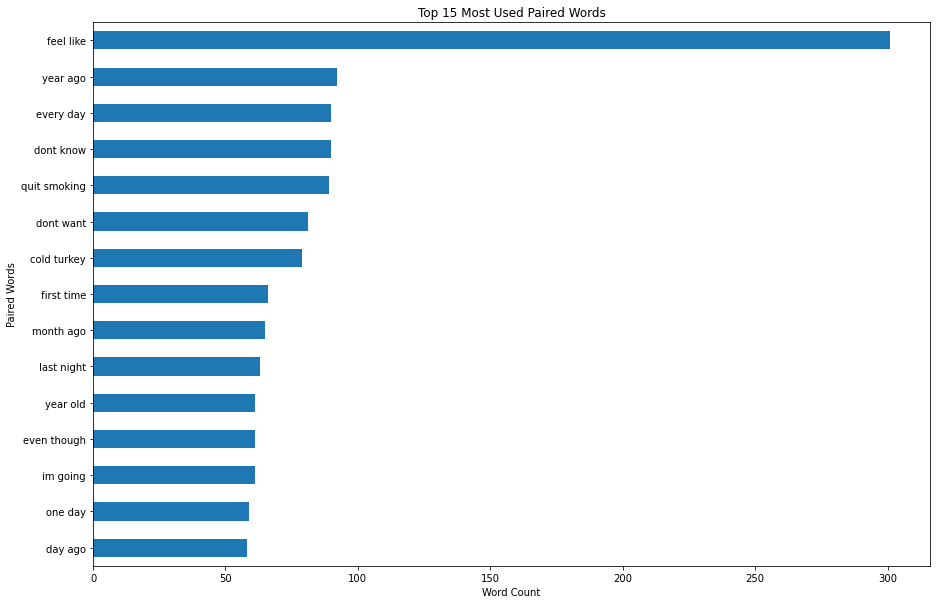

In [254]:
#create a horizontal Bar plot to visualize the top 15 paired words
plt.figure(figsize=(15,10))
filtered_messages_selftext_matrix.sum().sort_values(ascending=True).tail(15).plot(kind='barh')
plt.xlabel('Word Count')
plt.ylabel('Paired Words')
plt.title('Top 15 Most Used Paired Words')

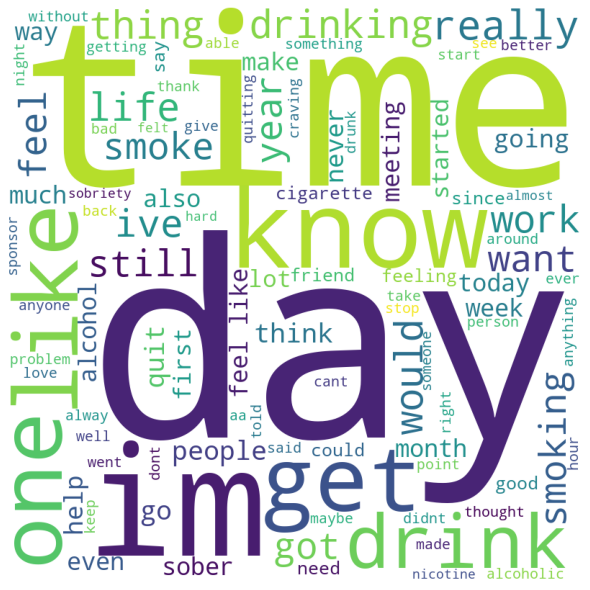

In [255]:
from wordcloud import WordCloud
from collections import Counter
import collections

#Visualize top 100 words in alcoholics anonymous
text = ''
stopwords = nltk.corpus.stopwords.words('english')
 
# iterate through train
for val in combined_AA_and_SS_df.cleaned_token_selftext:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()      
     
    text += " ".join(tokens)+" "
 
wordcloud = WordCloud(max_words= 100,
                      width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Data Cleaning Again
___
The above cleaning method with done with the default stopwords set. Although this will get rid of most of the most common words that are not needed before lemmatizing, adding custom words into the stopwords set will provide better information on what are the key words that should be included and not the generic ones.  To do so, a count needs to done to determine what are the top words used most frequently. From there, we can find out if there are any words that we believe can add to the stopwords set.
___

## Find out what additional words can be included to the default stopwords list
___

### N-Gram for Selftext: Apply CountVectorizer [ngram_range = (1,1)]

In [256]:
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range refers to the range of n-grams that we would like to look for. 
new_selftext_ngram_vect = CountVectorizer(ngram_range=(1,1), max_features=1000)
new_selftext_X_counts = new_selftext_ngram_vect.fit_transform(combined_AA_and_SS_df['cleaned_token_selftext'])

# Data Set has 70000 plus unique 2-word combinations but was limited to only 1000 
print(new_selftext_X_counts.shape)
print('\n')
print(new_selftext_ngram_vect.get_feature_names())

(2000, 1000)


['10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '23', '24', '25', '30', '34', '40', '45', '90', 'aa', 'ability', 'able', 'absolutely', 'abuse', 'accept', 'action', 'active', 'activity', 'actually', 'add', 'addict', 'addicted', 'addiction', 'addictive', 'admit', 'adult', 'advance', 'advice', 'afraid', 'age', 'ago', 'alcohol', 'alcoholic', 'alcoholism', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amends', 'amount', 'amp', 'ampx200b', 'anger', 'angry', 'anonymous', 'another', 'answer', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'apologize', 'app', 'appreciate', 'appreciated', 'area', 'around', 'as', 'ashamed', 'ask', 'asked', 'asking', 'asleep', 'attack', 'attempt', 'attend', 'attending', 'available', 'avoid', 'aware', 'away', 'awful', 'back', 'bad', 'bar', 'barely', 'basically', 'beat', 'beautiful', 'became', 'become', 'bed', 'beer', 'began', 'beginning', 'behav

In [257]:
#display the number of rows and columns in the sparse matrix
new_selftext_X_counts

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 63205 stored elements in Compressed Sparse Row format>

In [258]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
selftext_X_counts_df_sample = pd.DataFrame(new_selftext_X_counts.toarray())

#output sample of dataframe
selftext_X_counts_df_sample.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,1

In [259]:
#create a NumPy array from x counts sample
#create a new dataframe 'x_counts_df'
selftext_sample_X_counts_df = pd.DataFrame(new_selftext_X_counts.toarray())

#create column names from the feature names
selftext_sample_X_counts_df.columns = new_selftext_ngram_vect.get_feature_names()

#display output df
selftext_sample_X_counts_df.head()

,10,100,11,12,13,14,15,16,17,18,19,20,21,23,24,25,30,34,40,45,90,aa,ability,able,absolutely,abuse,accept,action,active,activity,actually,add,addict,addicted,addiction,addictive,admit,adult,advance,advice,afraid,age,ago,alcohol,alcoholic,alcoholism,almost,alone,along,already,also,although,always,amazing,amends,amount,amp,ampx200b,anger,angry,anonymous,another,answer,anxiety,anxious,anybody,anymore,anyone,anything,anyway,anyways,apologize,app,appreciate,appreciated,area,around,as,ashamed,ask,asked,asking,asleep,attack,attempt,attend,attending,available,avoid,aware,away,awful,back,bad,bar,barely,basically,beat,beautiful,became,become,bed,beer,began,beginning,behavior,behind,believe,benefit,best,better,beyond,big,biggest,bill,binge,birthday,bit,black,blacked,blood,body,book,booze,bottle,bottom,bought,boyfriend,brain,break,breath,breathing,bring,broke,brother,brought,browse,building,bunch,busy,buy,buying,call,called,calm,came,cancer,cannot,cant,car,care,career,carr,case,cause,caused,celebrate,chain,chance,change,changed,character,check,chest,child,childhood,chip,choice,choose,cig,cigarette,cigs,class,clean,clear,close,coffee,cold,college,come,coming,comment,community,company,complete,completely,confused,connection,consider,considering,constant,constantly,continue,control,conversation,convinced,cope,cough,could,couldnt,country,couple,course,covid,crave,craving,crazy,cry,curious,currently,cut,cycle,dad,daily,damage,damn,date,dating,daughter,day,deal,dealing,death,decided,decision,deep,defect,definitely,depressed,depression,deserve,desire,desperate,despite,detox,didnt,die,died,difference,different,difficult,dinner,disease,doctor,doesnt,dog,done,dont,door,doubt,drank,dream,drink,drinker,drinking,drive,drug,drunk,due,early,easier,easily,easy,eat,eating,effect,either,else,embarrassed,emotion,emotional,empty,encouragement,end,ended,energy,enjoy,enough,entire,especially,etc,even,evening,event,eventually,ever,every,everyday,everyone,everything,ex,exactly,example,except,excited,excuse,expect,experience,experienced,experiencing,explain,extra,extreme,extremely,eye,face,fact,failed,failure,faith,fall,family,far,fast,father,fear,feel,feeling,fell,fellow,fellowship,felt,fight,fighting,figure,figured,finally,find,finding,fine,first,fit,five,fix,focus,fog,food,forever,forget,form,forward,found,four,free,friday,friend,fuck,fucked,fucking,full,fully,fun,future,game,gave,general,genuinely,get,getting,gift,girl,girlfriend,give,given,giving,glad,glass,go,goal,god,going,gone,gonna,good,got,gotten,grateful,gratitude,great,greatly,group,guess,guilt,guilty,gum,guy,gym,habit,half,hand,handle,hang,hangover,happen,happened,happening,happens,happy,hard,harder,hate,havent,he,head,headache,health,healthy,hear,heard,heart,heavily,heavy,hell,hello,help,helped,helpful,helping,hey,hi,hide,high,higher,hit,hold,home,honest,honestly,hope,hopefully,hopeless,hoping,horrible,hospital,hour,house,however,huge,human,hurt,husband,id,idea,idk,ill,im,immediately,important,including,inside,insight,instead,intense,interested,inventory,isnt,issue,ive,iwndwyt,job,journey,juice,juul,keep,keeping,kept,kid,kill,killing,kind,kinda,knew,know,knowing,known,lack,last,lasted,late,lately,later,le,lead,learn,learned,least,leave,leaving,left,let,letting,level,lie,life,light,like,line,liquor,list,listen,listening,literally,little,live,liver,living,lol,long,longer,longest,look,looked,looking,lose,losing,lost,lot,love,loved,low,lozenge,luck,lunch,lung,mad,made,main,mainly,make,making,man,manage,managed,many,mark,matter,may,maybe,mean,med,medical,medication,meditation,meet,meeting,meetinghttpsaaintergrouporgoiaameetings,member,memory,mental,mentally,mentioned,mess,message,met,might,mind,mine,minute,miserable,miss,missed,mistake,mom,moment,monday,money,month,morning,mostly,mother,motivation,mouth,move,moved,movie,moving,much,multiple,must,name,near,nearly,need,needed,negative,nervous,never,new,newcomer,next,nice,nicotine,night,non,none,nonsmoker,normal,normally,nothing,noticed,nrt,number,obviously,

### EDA: Find out what are the top words used for N-Grams Selftext Column

In [260]:
#create a feature name dataframe for selftext column
filtered_messages_selftext_matrix = pd.DataFrame(selftext_sample_X_counts_df, columns=new_selftext_ngram_vect.get_feature_names())

#showcase the top 50 words used in the selftext column 
filtered_messages_selftext_matrix.sum().sort_values(ascending=False).head(50)

day          1402
time         1068
like         1038
im           1027
feel          881
year          860
know          823
get           761
smoking       721
want          684
one           643
quit          642
really        608
would         593
drinking      579
drink         553
go            548
month         532
life          528
ive           520
smoke         515
going         501
sober         498
week          487
thing         486
dont          474
back          448
got           442
meeting       439
help          419
still         415
aa            413
even          412
work          410
people        406
last          406
think         403
cigarette     403
much          402
first         389
never         377
make          363
none          355
alcohol       337
every         336
since         332
anyone        328
started       328
need          328
today         316
dtype: int64

Text(0.5, 1.0, 'Top 15 Most Used Paired Words')

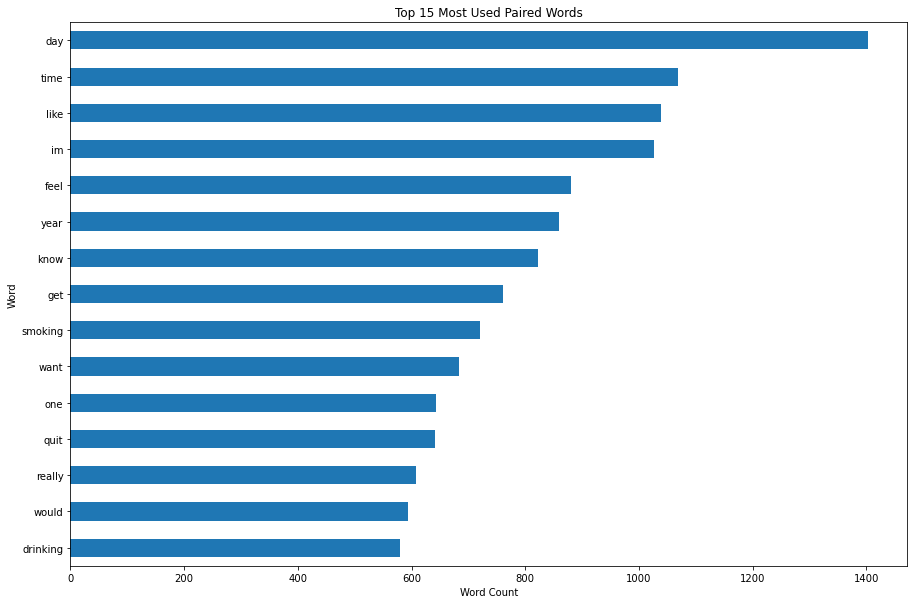

In [261]:
#create a horizontal Bar plot to visualize the top 15 paired words
filtered_messages_selftext_matrix.sum().sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(15,10))
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.title('Top 15 Most Used Paired Words')

There are quite a few words that we believe can be added to the stopwords.  Words such as, 'day', 'im', 'like', 'time', 'feel', 'year', 'know', 'get', 'want', 'ive', 'wa', 've' and some others. Those will be added into the stopwords.

### Edit Stopwords

In [262]:
#add non-meaningful words from the top words list above to the stopwords dictionary

from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['day', 'im', 'like', 'time', 'feel', 'year', 'know', 'get','want', 'ive', 'wa', 've', 'just']

stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

stop_words

['all',
 'still',
 'elsewhere',
 'thereupon',
 'amount',
 'former',
 'well',
 'been',
 'fifteen',
 'there',
 'yourselves',
 'upon',
 'beforehand',
 'against',
 'rather',
 'would',
 'fire',
 'from',
 'almost',
 'last',
 'too',
 'further',
 'not',
 'him',
 'show',
 'system',
 'into',
 'also',
 'wa',
 'empty',
 'im',
 'become',
 'hasnt',
 'therefore',
 'everything',
 'next',
 'although',
 'fill',
 'whole',
 'same',
 'us',
 'full',
 'find',
 'bill',
 'two',
 'itself',
 'becoming',
 'whoever',
 'always',
 'she',
 'mostly',
 'whenever',
 'hereupon',
 'five',
 'very',
 'who',
 'through',
 'except',
 'sometime',
 'in',
 'seeming',
 'anyway',
 'mine',
 'they',
 'take',
 'beyond',
 'mill',
 'her',
 'eight',
 'namely',
 'thereafter',
 'whither',
 'whether',
 'more',
 'eg',
 'onto',
 'describe',
 'only',
 'should',
 'four',
 'thereby',
 'yourself',
 'otherwise',
 'yet',
 'once',
 'them',
 'as',
 'myself',
 'while',
 'which',
 'am',
 'where',
 'then',
 'whereas',
 'became',
 'perhaps',
 'are',
 'th

In [263]:
#to confirm that it is a list and not a frozendata
type(stop_words)

list

## Redo N-Grams with the new Stopwords dictionary and see the new top words

### Remove Punctuations

In [264]:
# string.punctuation comprises of a list of all punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [265]:
#create a funtion to remove all punctuation
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
#create a new column named 'title_clean' to hold the new set of strings
combined_AA_and_SS_df['selftext_clean'] = combined_AA_and_SS_df['selftext'].apply(lambda x: remove_punct(x))
#display a sample size of the new
combined_AA_and_SS_df.head()

,selftext,subreddit,cleaned_token_selftext,selftext_clean
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous,used sing band also sung lot karaoke always singer good got sober though stopped almost 2 year since sang karaoke even partly covid mostly couldnt bring go bar sing sober well finally went tonight step dad went drank pepsi sang one song terrified shaking even started mean almost panic attack would let emotion take love sing determined put song wait like 7 people go every time called next singer heart beating fast short breath ridiculous mean singing entire life damn scared finally call name get step dad said first two line song little worried fucking killed killed amazing fucking sober still sing still sing rock still get sober afterwards literally grabbed purse walked shaking bad move everyone cheered clapped wanted sing one enough probably go soon someone program sings damn first song sober crazy nerve insane one shot vodka would calmed right dont need anymore aa know something terrifies anyway got hp powerful booze could ever give thank aa,I used to sing in a band I also have sung a lot of karaoke I have always been a singer I am good at it Once I got sober though I just stopped Its been almost 2 years since I have sang karaoke even Partly because of Covid but mostly because I couldnt bring myself to go into a bar and sing sober \nWell I finally went tonight Me and my step dad went and drank Pepsi and I sang one song I was terrified Shaking before I even started I mean almost a panic attack if I would have let my emotions take over But I love to sing I was determined I put up my song and had to wait for like 7 people to go before me Every time he called the next singer my heart was beating so fast and I was short of breath It was ridiculous I mean I have been singing my entire life Why was a so damn scared Finally they call my name and I get up there My step dad said after the first two lines of the song he was a little worried But after that I fucking killed it I killed it I was amazing I did it and I did it fucking sober I can still sing and I can still sing Rock and I can still get into it Sober \nAfterwards I literally grabbed my purse and I walked out I was shaking so bad I had to move Everyone cheered and clapped and they wanted me to sing again but one was enough I will probably go again soo

### Tokenization

In [266]:
import re

def tokenize(text):
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

combined_AA_and_SS_df['selftext_clean_tokenized'] = combined_AA_and_SS_df['selftext_clean'].apply(lambda x: tokenize(x.lower()))

combined_AA_and_SS_df.head()

,selftext,subreddit,cleaned_token_selftext,selftext_clean,selftext_clean_tokenized
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous,used sing band also sung lot karaoke always singer good got sober though stopped almost 2 year since sang karaoke even partly covid mostly couldnt bring go bar sing sober well finally went tonight step dad went drank pepsi sang one song terrified shaking even started mean almost panic attack would let emotion take love sing determined put song wait like 7 people go every time called next singer heart beating fast short breath ridiculous mean singing entire life damn scared finally call name get step dad said first two line song little worried fucking killed killed amazing fucking sober still sing still sing rock still get sober afterwards literally grabbed purse walked shaking bad move everyone cheered clapped wanted sing one enough probably go soon someone program sings damn first song sober crazy nerve insane one shot vodka would calmed right dont need anymore aa know something terrifies anyway got hp powerful booze could ever give thank aa,I used to sing in a band I also have sung a lot of karaoke I have always been a singer I am good at it Once I got sober though I just stopped Its been almost 2 years since I have sang karaoke even Partly because of Covid but mostly because I couldnt bring myself to go into a bar and sing sober \nWell I finally went tonight Me and my step dad went and drank Pepsi and I sang one song I was terrified Shaking before I even started I mean almost a panic attack if I would have let my emotions take over But I love to sing I was determined I put up my song and had to wait for like 7 people to go before me Every time he called the next singer my heart was beating so fast and I was short of breath It was ridiculous I mean I have been singing my entire life Why was a so damn scared Finally they call my name and I get up there My step dad said after the first two lines of the song he was a little worried But after that I fucking killed it I killed it I was amazing I did it and I did it fucking sober I can still sing and I can still sing Rock and I can still get into it Sober \nAfterwards I literally grabbed my purse and I walked out I was shaking so bad I had to move Everyone cheered and clapped and they wanted me to sing again but one was enough I w

### Lemmatize the text

In [267]:
#create an instance for lemmatizer function
wn = nltk.WordNetLemmatizer()

#create a function to lemmatizing the tokened words
def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

#add new column for the lammatizied words
combined_AA_and_SS_df['selftext_clean_lemmatized'] = combined_AA_and_SS_df['selftext_clean_tokenized'].apply(lambda x: lemmatizing(x))

#display a sample of the updated dataframe
combined_AA_and_SS_df.head(10)

,selftext,subreddit,cleaned_token_selftext,selftext_clean,selftext_clean_tokenized,selftext_clean_lemmatized
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous,used sing band also sung lot karaoke always singer good got sober though stopped almost 2 year since sang karaoke even partly covid mostly couldnt bring go bar sing sober well finally went tonight step dad went drank pepsi sang one song terrified shaking even started mean almost panic attack would let emotion take love sing determined put song wait like 7 people go every time called next singer heart beating fast short breath ridiculous mean singing entire life damn scared finally call name get step dad said first two line song little worried fucking killed killed amazing fucking sober still sing still sing rock still get sober afterwards literally grabbed purse walked shaking bad move everyone cheered clapped wanted sing one enough probably go soon someone program sings damn first song sober crazy nerve insane one shot vodka would calmed right dont need anymore aa know something terrifies anyway got hp powerful booze could ever give thank aa,I used to sing in a band I also have sung a lot of karaoke I have always been a singer I am good at it Once I got sober though I just stopped Its been almost 2 years since I have sang karaoke even Partly because of Covid but mostly because I couldnt bring myself to go into a bar and sing sober \nWell I finally went tonight Me and my step dad went and drank Pepsi and I sang one song I was terrified Shaking before I even started I mean almost a panic attack if I would have let my emotions take over But I love to sing I was determined I put up my song and had to wait for like 7 people to go before me Every time he called the next singer my heart was beating so fast and I was short of breath It was ridiculous I mean I have been singing my entire life Why was a so damn scared Finally they call my name and I get up there My step dad said after the first two lines of the song he was a little worried But after that I fucking killed it I killed it I was amazing I did it and I did it fucking sober I can still sing and I can still sing Rock and I can still get into it Sober \nAfterwards I literally grabbed my purse and I walked out I was shaking so bad I had to move Everyone cheered and clapped and they wanted me to sing ag

### Remove stop words with new Stop Words Dict

In [268]:
import nltk

#create a function that removes all the default stopwords
def remove_stopwords(tokenized_list):
    # Store in text only if word is not found in stopword
    text = [word for word in tokenized_list if word not in stop_words]
    return text

#create a new column for cleaned set of words without any stopwords
combined_AA_and_SS_df['selftext_clean_nostopwords'] = combined_AA_and_SS_df['selftext_clean_lemmatized'].apply(lambda x: remove_stopwords(x))

#display a sample size of the updated dataframe
combined_AA_and_SS_df.head()

,selftext,subreddit,cleaned_token_selftext,selftext_clean,selftext_clean_tokenized,selftext_clean_lemmatized,selftext_clean_nostopwords
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous,used sing band also sung lot karaoke always singer good got sober though stopped almost 2 year since sang karaoke even partly covid mostly couldnt bring go bar sing sober well finally went tonight step dad went drank pepsi sang one song terrified shaking even started mean almost panic attack would let emotion take love sing determined put song wait like 7 people go every time called next singer heart beating fast short breath ridiculous mean singing entire life damn scared finally call name get step dad said first two line song little worried fucking killed killed amazing fucking sober still sing still sing rock still get sober afterwards literally grabbed purse walked shaking bad move everyone cheered clapped wanted sing one enough probably go soon someone program sings damn first song sober crazy nerve insane one shot vodka would calmed right dont need anymore aa know something terrifies anyway got hp powerful booze could ever give thank aa,I used to sing in a band I also have sung a lot of karaoke I have always been a singer I am good at it Once I got sober though I just stopped Its been almost 2 years since I have sang karaoke even Partly because of Covid but mostly because I couldnt bring myself to go into a bar and sing sober \nWell I finally went tonight Me and my step dad went and drank Pepsi and I sang one song I was terrified Shaking before I even started I mean almost a panic attack if I would have let my emotions take over But I love to sing I was determined I put up my song and had to wait for like 7 people to go before me Every time he called the next singer my heart was beating so fast and I was short of breath It was ridiculous I mean I have been singing my entire life Why was a so damn scared Finally they call my name and I get up there My step dad said after the first two lines of the song he was a little worried But after that I fucking killed it I killed it I was amazing I did it and I did it fucking sober I can still sing and I can still sing Rock and I can still get into it Sober \nAfterwards I literally grabbed my purse and I walked out I was shaking so bad I had to move Everyone cheered and clapped an

In [269]:
#create a function to rejoin the individual listed words to a continuous string
def join_words(nostopwords):
    nostopwords = " ".join([word for word in nostopwords])
    return nostopwords

In [270]:
#test the function
join_words(['going', 'pretty', 'hard'])

'going pretty hard'

In [271]:
#apply the function to the selftext_clean_nostopwords and create a new column to store them
combined_AA_and_SS_df['Joined_Nostopwords'] = combined_AA_and_SS_df['selftext_clean_nostopwords'].apply(lambda x: join_words(x))

In [272]:
#output a sample
combined_AA_and_SS_df.head()

,selftext,subreddit,cleaned_token_selftext,selftext_clean,selftext_clean_tokenized,selftext_clean_lemmatized,selftext_clean_nostopwords,Joined_Nostopwords
0,"I used to sing in a band. I also have sung a lot of karaoke. I have always been a singer. I am good at it. Once I got sober though, I just stopped. It's been almost 2 years since I have sang karaoke even. Partly because of Covid but mostly because I couldn't bring myself to go into a bar and sing sober. \nWell I finally went tonight. Me and my step dad went and drank Pepsi and I sang one song. I was terrified. Shaking before I even started. I mean almost a panic attack if I would have let my emotions take over. But I love to sing I was determined. I put up my song and had to wait for like 7 people to go before me. Every time he called the next singer my heart was beating so fast and I was short of breath. It was ridiculous. I mean, I have been singing my entire life. Why was a so damn scared. Finally they call my name and I get up there. My step dad said after the first two lines of the song he was a little worried. But after that, I fucking killed it. I killed it! I was amazing. I did it, and I did it fucking sober! I can still sing and I can still sing Rock and I can still get into it. Sober!! \nAfterwards I literally grabbed my purse and I walked out. I was shaking so bad I had to move. Everyone cheered and clapped and they wanted me to sing again but one was enough. I will probably go again soon with someone from the program that sings but damn. That first song sober. It was crazy. My nerves were insane and just one shot of vodka would have calmed me right down. But I don't need that anymore. Because of AA I know that if something terrifies me, I can do it anyway. I got a HP that is more powerful than what booze could ever give me. Thank you AA!",alcoholicsanonymous,used sing band also sung lot karaoke always singer good got sober though stopped almost 2 year since sang karaoke even partly covid mostly couldnt bring go bar sing sober well finally went tonight step dad went drank pepsi sang one song terrified shaking even started mean almost panic attack would let emotion take love sing determined put song wait like 7 people go every time called next singer heart beating fast short breath ridiculous mean singing entire life damn scared finally call name get step dad said first two line song little worried fucking killed killed amazing fucking sober still sing still sing rock still get sober afterwards literally grabbed purse walked shaking bad move everyone cheered clapped wanted sing one enough probably go soon someone program sings damn first song sober crazy nerve insane one shot vodka would calmed right dont need anymore aa know something terrifies anyway got hp powerful booze could ever give thank aa,I used to sing in a band I also have sung a lot of karaoke I have always been a singer I am good at it Once I got sober though I just stopped Its been almost 2 years since I have sang karaoke even Partly because of Covid but mostly because I couldnt bring myself to go into a bar and sing sober \nWell I finally went tonight Me and my step dad went and drank Pepsi and I sang one song I was terrified Shaking before I even started I mean almost a panic attack if I would have let my emotions take over But I love to sing I was determined I put up my song and had to wait for like 7 people to go before me Every time he called the next singer my heart was beating so fast and I was short of breath It was ridiculous I mean I have been singing my entire life Why was a so damn scared Finally they call my name and I get up there My step dad said after the first two lines of the song he was a little worried But after that I fucking killed it I killed it I was amazing I did it and I did it fucking sober I can still sing and I can still sing Rock and I can still get into it Sober \nAfterwards I literally grabbed my purse and I walked out I was shaking so bad I had to move Everyone che

### Apply CountVectorizer (w/ N-Grams)

In [273]:
from sklearn.feature_extraction.text import CountVectorizer

# ngram_range refers to the range of n-grams that we would like to look for. 
new_stopwords_selftext_ngram_vect = CountVectorizer(ngram_range=(1,1), max_features=1000)

new_stopwords_selftext_X_counts = new_stopwords_selftext_ngram_vect.fit_transform(combined_AA_and_SS_df['Joined_Nostopwords'])

#print out unique words
print(new_stopwords_selftext_X_counts.shape)
print('\n')
print(new_stopwords_selftext_ngram_vect.get_feature_names())

(2000, 1000)


['10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1st', '20', '2020', '21', '22', '23', '24', '25', '28', '30', '34', '35', '3rd', '40', '45', '90', 'aa', 'ability', 'able', 'absolutely', 'abuse', 'accept', 'account', 'act', 'action', 'active', 'activity', 'actually', 'add', 'addict', 'addicted', 'addiction', 'addictive', 'adhd', 'admit', 'adult', 'advance', 'advice', 'afraid', 'age', 'ago', 'air', 'alcohol', 'alcoholic', 'alcoholism', 'allen', 'alot', 'amazing', 'amends', 'amp', 'ampx200b', 'anger', 'angry', 'anonymous', 'answer', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyways', 'apologize', 'apology', 'app', 'appreciate', 'appreciated', 'approach', 'area', 'arent', 'ashamed', 'ask', 'asked', 'asking', 'asleep', 'attack', 'attempt', 'attend', 'attending', 'attention', 'available', 'avoid', 'aware', 'away', 'awful', 'baby', 'bad', 'bar', 'barely', 'basically', 'beat', 'beautiful', 'bed', 'beer', 'began', 'beginning', 'behavior', 'believe', 'benef

In [274]:
#how the rows and column
new_stopwords_selftext_X_counts

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 49428 stored elements in Compressed Sparse Row format>

In [275]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
new_stopwords_selftext_X_counts_df = pd.DataFrame(new_stopwords_selftext_X_counts.toarray())

new_stopwords_selftext_X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Add subreddit to the new dataframe

In [276]:
#add subreddit column to the selftext_sample_X_counts_df to complete the data set
new_stopwords_selftext_X_counts_df['subreddit'] = combined_AA_and_SS_df['subreddit']

In [277]:
#output sample of new dataframe: top end
new_stopwords_selftext_X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,subreddit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [278]:
#output sample of new dataframe: bottom end
new_stopwords_selftext_X_counts_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,subreddit
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Export it as CSV file

In [279]:
#save the new dataframe out to prevent any errors
new_stopwords_selftext_X_counts_df.to_csv('../data/combined_AA_and_SS_df-new_stopwords.csv', index=None)

In [280]:
#create a NumPy array from x counts sample
#create a new dataframe 'x_counts_df'
new_stopwords_selftext_X_counts_df = pd.DataFrame(new_stopwords_selftext_X_counts.toarray())

#create column names from the feature names
new_stopwords_selftext_X_counts_df.columns = new_stopwords_selftext_ngram_vect.get_feature_names()

#display output df
new_stopwords_selftext_X_counts_df.head()

,10,100,11,12,13,14,15,16,17,18,19,1st,20,2020,21,22,23,24,25,28,30,34,35,3rd,40,45,90,aa,ability,able,absolutely,abuse,accept,account,act,action,active,activity,actually,add,addict,addicted,addiction,addictive,adhd,admit,adult,advance,advice,afraid,age,ago,air,alcohol,alcoholic,alcoholism,allen,alot,amazing,amends,amp,ampx200b,anger,angry,anonymous,answer,anxiety,anxious,anybody,anymore,anyways,apologize,apology,app,appreciate,appreciated,approach,area,arent,ashamed,ask,asked,asking,asleep,attack,attempt,attend,attending,attention,available,avoid,aware,away,awful,baby,bad,bar,barely,basically,beat,beautiful,bed,beer,began,beginning,behavior,believe,benefit,best,better,big,biggest,binge,birthday,bit,black,blacked,blood,body,book,booze,bottle,bought,boyfriend,brain,break,breath,breathe,breathing,bring,broke,broken,brother,brought,browse,building,bunch,burj,busy,buy,buying,called,calm,came,cancer,car,care,career,carr,case,cause,caused,celebrate,chain,chance,change,changed,character,check,chest,child,childhood,chip,choice,choose,cig,cigarette,cigs,class,clean,clear,close,coffee,cold,college,come,comfort,coming,comment,community,company,complete,completely,confused,connection,consequence,consider,considering,constant,constantly,contact,continue,control,conversation,convinced,cope,cough,coughing,couldn,count,country,couple,course,covid,crave,craving,crazy,curious,currently,cut,cutting,cycle,dad,daily,damage,damn,date,dating,daughter,deal,dealing,death,decade,decided,decision,deep,defect,definitely,depressed,depression,deserve,desire,desperate,despite,detox,diagnosed,did,didn,didnt,die,died,difference,different,difficult,dinner,disease,disorder,doctor,doe,doesn,doesnt,dog,doing,don,dont,door,doubt,drag,drank,dream,drink,drinker,drinking,drive,driving,drop,drug,drunk,dry,dying,early,easier,easily,easy,eat,eating,effect,effort,embarrassed,emotion,emotional,encouragement,end,ended,energy,enjoy,entire,especially,evening,event,eventually,everyday,ex,exactly,example,excited,excuse,expect,expensive,experience,experienced,experiencing,explain,extra,extreme,extremely,eye,face,fact,failed,failure,faith,fall,family,far,fast,father,fault,fear,feeling,fell,fellow,fellowship,felt,fifth,fight,fighting,figure,figured,finally,finding,fine,finish,fit,fix,focus,fog,following,food,forced,forever,forget,form,forward,free,frequently,friday,friend,friendship,fuck,fucked,fucking,fully,fun,function,functioning,future,game,gave,general,genuinely,getting,gift,girl,girlfriend,given,giving,glad,glass,goal,god,going,gone,gonna,good,got,gotten,gradually,grateful,gratitude,great,greatly,group,grow,guess,guilt,guilty,gum,guy,gym,ha,habit,hair,half,hand,handle,hang,hangover,happen,happened,happening,happens,happy,hard,harder,hardest,hate,haven,havent,having,head,headache,health,healthy,hear,heard,heart,heavily,heavy,hell,hello,help,helped,helpful,helping,hey,hi,hide,high,higher,hit,hold,home,honest,honestly,hope,hopefully,hopeless,hoping,horrible,hospital,hour,house,huge,human,hurt,husband,id,idea,idk,ill,imagine,immediately,important,including,inside,insight,insomnia,instead,insurance,intense,intention,interested,inventory,involved,isn,isnt,issue,iwndwyt,job,journey,juice,juul,keeping,kept,khalifa,kid,kill,killing,kind,kinda,knew,knowing,known,lack,lasted,late,lately,later,le,lead,learn,learned,leave,leaving,left,let,letting,level,lie,life,light,line,liquor,list,listen,listening,literally,little,live,liver,living,ll,local,lol,long,longer,longest,look,looked,looking,lose,losing,lost,lot,love,loved,low,lozenge,luck,lunch,lung,mad,main,mainly,major,make,making,man,manage,managed,mark,matter,maybe,mean,med,medical,medication,meditation,meet,meeting,meetinghttpsaaintergrouporgoiaameetings,member,memory,men,mental,mentally,mentioned,mess,message,met,method,mind,minute,miserable,miss,missed,mistake,mom,moment,monday,money,month,mood,morning,mother,motivated,motivation,mouth,moved,movie,moving,multiple,near,nearly,need,needed,negative,nervous,new,newcomer,news,nice,nicotin

### Top 15 Words used after apply new Stopwords List

In [281]:
#create a feature name dataframe for selftext column
new_stopwords_filtered_messages_selftext_matrix = pd.DataFrame(new_stopwords_selftext_X_counts_df, columns=new_stopwords_selftext_ngram_vect.get_feature_names())

#showcase the top 50 words used in the selftext column 
new_stopwords_filtered_messages_selftext_matrix.sum().sort_values(ascending=False).head(50)

smoking      721
quit         642
really       608
drinking     579
drink        553
month        532
life         528
ha           518
smoke        515
going        501
sober        498
week         487
thing        486
dont         474
got          442
don          440
meeting      439
help         419
aa           413
work         410
people       406
think        403
cigarette    403
make         363
alcohol      337
did          336
started      328
need         328
today        316
good         315
stop         313
way          308
feeling      295
friend       293
ago          292
say          284
step         279
alcoholic    275
thought      274
lot          271
night        270
better       261
right        245
went         239
nicotine     229
bad          229
getting      220
having       214
craving      213
problem      212
dtype: int64

### Top 15 Words Used in Visualization

Text(0.5, 1.0, 'Top 15 Most Used Paired Words')

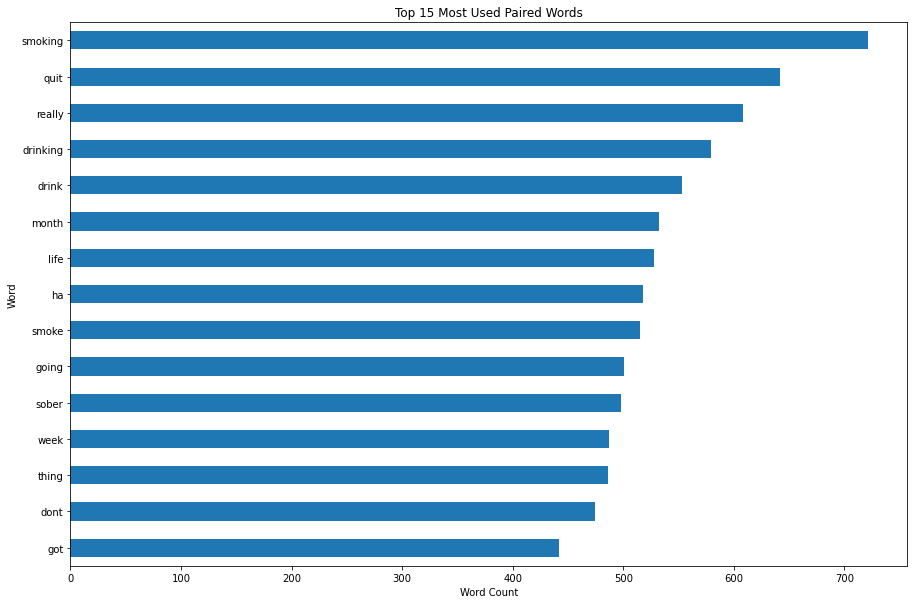

In [282]:
#create a horizontal Bar plot to visualize the top 15 paired words
new_stopwords_filtered_messages_selftext_matrix.sum().sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(15,10))
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.title('Top 15 Most Used Paired Words')

___
After adding more words to the default Stopwords list, the result came out more realistic to what we have in mind.  There are more words we believe can be added to the Stopwords list that will improve the machine's ability to learn.
___